In [1]:
# Import packages (pandas and sklearn)
from pandas import read_csv
from sklearn.linear_model import Ridge

In [2]:
#import csv
on_df = read_csv('./ontariocases.csv')
on_df.head(5)

,_id,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,1,2020-03-14T00:00:00,2020-03-21T00:00:00,2020-03-23T00:00:00,2020-03-20T00:00:00,40s,FEMALE,TRAVEL,Resolved,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
1,2,2,2020-03-12T00:00:00,2020-03-20T00:00:00,2020-03-20T00:00:00,2020-03-19T00:00:00,30s,FEMALE,NO KNOWN EPI LINK,Resolved,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
2,3,3,2020-03-16T00:00:00,2020-03-22T00:00:00,2020-03-22T00:00:00,2020-03-21T00:00:00,20s,MALE,TRAVEL,Resolved,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
3,4,4,2020-03-17T00:00:00,2020-03-22T00:00:00,2020-03-22T00:00:00,2020-03-18T00:00:00,60s,MALE,OB,Resolved,Yes,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
4,5,5,2020-03-16T00:00:00,2020-03-22T00:00:00,2020-03-22T00:00:00,2020-03-20T00:00:00,60s,MALE,NO KNOWN EPI LINK,Fatal,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


In [3]:
on_df.drop(['_id', 'Row_ID', 'Case_Reported_Date', 'Test_Reported_Date', 'Specimen_Date', 'Outbreak_Related', 'Case_AcquisitionInfo', 'Outcome1', 'Reporting_PHU_ID', 'Reporting_PHU', 'Reporting_PHU_Address', 'Reporting_PHU_City', 'Reporting_PHU_Postal_Code', 'Reporting_PHU_Website', 'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude'], axis=1, inplace=True)

In [4]:
##remove excess characters from column 1,2,3
#remove T00:00:00 from col1
on_df['Accurate_Episode_Date'].replace(regex=True,inplace=True,to_replace=r'T00:00:00',value=r'')
#remove all non-digit characters like 's' and '<' from col2
on_df['Age_Group'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
#change Female to F and Male to M from col3
on_df['Client_Gender'].replace(regex=True,inplace=True,to_replace=r'FEMALE',value=r'F')
on_df['Client_Gender'].replace(regex=True,inplace=True,to_replace=r'MALE',value=r'M')
on_df

,Accurate_Episode_Date,Age_Group,Client_Gender
0,2020-03-14,40,F
1,2020-03-12,30,F
2,2020-03-16,20,M
3,2020-03-17,60,M
4,2020-03-16,60,M
...,...,...,...
208389,2020-12-22,20,F
208390,2020-12-24,30,F
208391,2020-11-04,60,F
208392,2020-10-28,30,M


In [5]:
#sorting df values by date instead of input order
on_df = on_df.sort_values('Accurate_Episode_Date',ascending=True)

In [6]:
on_df = on_df.dropna(how='any',axis=0) # Drops all rows that contain null values
on_df

,Accurate_Episode_Date,Age_Group,Client_Gender
127362,2020-01-01,50,F
61012,2020-01-01,80,M
11047,2020-01-01,50,M
96037,2020-01-10,50,M
144465,2020-01-16,50,F
...,...,...,...
44078,2021-01-07,60,F
95987,2021-01-07,50,F
95817,2021-01-07,60,M
95815,2021-01-07,50,F


In [7]:
# double check nan are gone
on_df.isnull().values.any()

False

In [8]:
# add column for number of cases
on_df.insert(0, 'Cases', range(1, 1 + len(on_df)))
on_df

,Cases,Accurate_Episode_Date,Age_Group,Client_Gender
127362,1,2020-01-01,50,F
61012,2,2020-01-01,80,M
11047,3,2020-01-01,50,M
96037,4,2020-01-10,50,M
144465,5,2020-01-16,50,F
...,...,...,...,...
44078,208351,2021-01-07,60,F
95987,208352,2021-01-07,50,F
95817,208353,2021-01-07,60,M
95815,208354,2021-01-07,50,F


In [9]:
# rename columns
on_df.columns = ['Cases', 'Date', 'Age', 'Gender']
on_df

,Cases,Date,Age,Gender
127362,1,2020-01-01,50,F
61012,2,2020-01-01,80,M
11047,3,2020-01-01,50,M
96037,4,2020-01-10,50,M
144465,5,2020-01-16,50,F
...,...,...,...,...
44078,208351,2021-01-07,60,F
95987,208352,2021-01-07,50,F
95817,208353,2021-01-07,60,M
95815,208354,2021-01-07,50,F


<AxesSubplot:xlabel='Date', ylabel='Cases'>

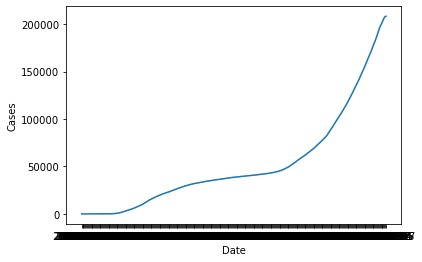

In [10]:
#plot Date vs. cases
import seaborn as sns
sns.lineplot(data=on_df, x="Date",y="Cases")

In [12]:
# clf function
clf = Ridge(alpha=1.0)
# alpha is the magnitude of penalization
predictors = ["Age","Gender"]
clf.fit(on_df[predictors],on_df["Cases"])

ValueError: could not convert string to float: ''